In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv
/kaggle/input/greater4/c.csv


In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

# import libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re,random,os
import seaborn as sns
from nltk.corpus import stopwords
import string
from pprint import pprint as pprint

# spacy for basic processing, optional, can use nltk as well(lemmatisation etc.)
import spacy

#gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#plotting tools
import pyLDAvis
import pyLDAvis.gensim #dont skip this
import matplotlib.pyplot as plt
%matplotlib inline
spacy.cli.download("en")

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.3 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.3 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.3 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.3 requires wrapt~=1.12.1, but you have wrapt 1.14.0 which is incompatible.
tensorflow-transform 1.7.0 requires pyarrow<6,>=1, but you have pyarrow 7.0.0 which is incompatible.
tensorflow-transform 1.7.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<2.9,>=1.15.5, but you have tensorflow 2.6.3 which is incompatible.
tensorflow-serving-api 2.8.0 requires tensorflow<3,>=2.8.0, but you have tensorflow 2.6.3 which i

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
dd=pd.read_csv('../input/greater4/c.csv')
df=dd.loc[dd["score"] == 1].astype(str)
#df=pd.read_csv('../input/cyberbullying-classification/cyberbullying_tweets.csv').astype(str)
# tokenize using gensims simple_preprocess
def sent_to_words(sentences, deacc=True):  # deacc=True removes punctuations
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))

# conver to list
data=df['content'].values.tolist()
data_words=list(sent_to_words(data))

#sample
print(data_words[1])

['installed', 'this', 'app', 'huge', 'delay', 'on', 'receiving', 'and', 'sending', 'messages', 'sent', 'more', 'than', 'emails', 'to', 'costumer', 'service', 'and', 'they', 'did', 'not', 'care', 'they', 'just', 'told', 'me', 'we', 'are', 'working', 'on', 'it', 'and', 'there', 'was', 'no', 'change', 'their', 'help', 'support', 'is', 'awful', 'decided', 'to', 'reinstall', 'the', 'app', 'with', 'new', 'number', 'for', 'solving', 'the', 'app', 'delay', 'and', 'problem', 'after', 'that', 'they', 'blocked', 'my', 'account', 'and', 'told', 'me', 'you', 'have', 'several', 'accounts', 've', 'never', 'ever', 'seen', 'such', 'ridiculous', 'customer', 'support', 'sent', 'them', 'several', 'emails', 'and', 'they', 'did', 'not', 'answer']


In [4]:
from nltk.corpus import stopwords
stop_words= stopwords.words('english') + list(string.punctuation)
stop_words.extend(['from', 'subject', 're', 'to','sit','because','anything_about','things','do_not','hr','wont_be','edu', 'use','tinder','okc','app','account','even','used','likes','people','like','however','and','without','apps','years','try'
                 'trying','see','every','much','liked','list','get','dont','ever','day','days','cant','im','user','find','please','ive','really','month','back','so','one',
                 'many','want','way','better','time','also','give','way','work','things','questions','great','questions','search','using','need','seems','unless','actually',
                 'looking','watch','person','worth','worse','tried','new','made','would','think','new','change','someone','send','thing','though','could0','konw',
               'feature','fratures','got','meet','email','still','even','go','didnt','show','youre','able','nothing','thats','want','easy','keep','anyone','either',
                 'got','id','message','fb','facebook','already','three','gone','seem','everyone','worked','cannot','must','yep','delete','thanks','deleted',
                 'allow','stopped','well','nice','messages','months','phone','never','wont','lol','reason',
                 'doesnt','away','say','first','make','problem','pictures','keeps','friends','profile','com','pictures',
                 'https','etc','matched','1h','year','month','go','get','update','week','online0','go','report','say','word',
                  'ban','make','number','issue','let','term','last','click','say','go','work','application','totally','name','plan','match',
                   'set','customer','sign','cause','block','going','apparently','get','see','point','make','maybe','come','lot','guy','know','read','suck'])
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts,allowed_postags=['NOUN','ADJ','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out=[]
    for sent in texts:
        doc=nlp(' '.join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [5]:
# call functions

# remove stop words
data_words_npstops= remove_stopwords(data_words)

# initialize spacy 'en' model use only tagger since we don;t need parsing or NER
# python3 -m spacey download en
# spacy.cli.download("en")
nlp=spacy.load("en_core_web_sm",disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized=lemmatization(data_words_npstops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [6]:
id2word=corpora.Dictionary(data_lemmatized)

#create corpus
corpus=[id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 2), (68, 1)]


In [7]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ad', 1),
  ('button', 2),
  ('buy', 2),
  ('card', 1),
  ('choice', 1),
  ('currency', 1),
  ('decline', 1),
  ('escape', 1),
  ('file', 1),
  ('fully', 1),
  ('grey', 1),
  ('kill', 1),
  ('member', 1),
  ('nerve', 1),
  ('offer', 1),
  ('pay', 1),
  ('pop', 1),
  ('unresponsive', 1),
  ('window', 1),
  ('worst', 1)]]

In [8]:
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,random_state=50,\
                                          update_every=1,chunksize=50,passes=10,alpha=0.01,per_word_topics=True)

In [9]:
lda_model.print_topics()

[(0,
  '0.083*"swipe" + 0.074*"pay" + 0.057*"match" + 0.053*"gold" + 0.044*"money" + 0.027*"waste" + 0.023*"useless" + 0.023*"free" + 0.020*"get" + 0.019*"buy"'),
 (1,
  '0.047*"match" + 0.025*"open" + 0.024*"get" + 0.024*"try" + 0.023*"say" + 0.022*"notification" + 0.022*"go" + 0.020*"work" + 0.017*"download" + 0.016*"contact"'),
 (2,
  '0.042*"wrong" + 0.025*"woman" + 0.023*"always" + 0.023*"mile" + 0.022*"boost" + 0.021*"date" + 0.017*"show" + 0.015*"distance" + 0.015*"yet" + 0.015*"pretty"'),
 (3,
  '0.050*"super" + 0.045*"old" + 0.037*"ridiculous" + 0.033*"ad" + 0.031*"care" + 0.030*"literally" + 0.027*"bio" + 0.026*"chance" + 0.022*"block" + 0.022*"superlike"'),
 (4,
  '0.145*"log" + 0.052*"login" + 0.049*"try" + 0.046*"say" + 0.046*"error" + 0.037*"time" + 0.028*"code" + 0.027*"photo" + 0.026*"scam" + 0.021*"anymore"'),
 (5,
  '0.180*"ban" + 0.081*"bot" + 0.038*"spam" + 0.031*"access" + 0.030*"man" + 0.028*"report" + 0.022*"stupid" + 0.019*"love" + 0.019*"rate" + 0.016*"write"')

In [10]:
coherence_model_lda=CoherenceModel(model=lda_model,texts=data_lemmatized,dictionary=id2word,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.3328481082107099


In [11]:
from collections import OrderedDict
data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(4)}
#data_lda

In [12]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(4, 95)


In [13]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.215417  0.110612       1        1  18.509759
6     -0.159923  0.166603       2        1  17.257843
0     -0.176378 -0.240361       3        1  13.352621
2     -0.082308 -0.081650       4        1  12.423792
9     -0.130700 -0.201635       5        1  12.009436
4     -0.036019  0.311540       6        1   7.743275
5      0.199774 -0.043605       7        1   5.428182
7      0.170312  0.004471       8        1   5.279345
3      0.209253  0.006215       9        1   4.531677
8      0.221406 -0.032189      10        1   3.464068, topic_info=          Term         Freq        Total Category  logprob  loglift
451        log  5282.000000  5282.000000  Default  30.0000  30.0000
1692       ban  4611.000000  4611.000000  Default  29.0000  29.0000
15         pay  9023.000000  9023.000000  Default  28.0000  28.0000
905      swipe  5241.000000  5241.000000  Default  27.0000  27.0000
59       match  7910.000000  7910.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1327       sub   155.723482   156.980192  Topic10  -4.6515   3.3547
666   solution   152.632158   153.888833  Topic10  -4.6716   3.3545
712       fine   475.266315   667.514624  Topic10  -3.5358   3.0230
153     choose   256.216221   325.116870  Topic10  -4.1536   3.1246
411       wait   236.017213   564.130961  Topic10  -4.2357   2.4913

[425 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1254     10  0.997403    absolute
105       3  0.730102  absolutely
105       4  0.268343  absolutely
1281      6  0.992610      accept
422       7  0.997960      access
...     ...       ...         ...
1612     10  0.993603     working
19        8  0.997633       worst
967       7  0.997775       write
1084      4  0.999317       wrong
251       4  0.998805         yet

[474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 1, 3, 10, 5, 6, 8, 4, 9])

In [14]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range,alpha_range):
    coherence_values=[]
    model_list=[]
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, alpha=alpha,num_topics=num_topics,\
                                                      per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel=CoherenceModel(model=lda_model,texts=texts,dictionary=dictionary,coherence='c_v')
            coherence_values.append((alpha,num_topics,coherencemodel.get_coherence()))
    return model_list,coherence_values

In [15]:
num_topics_range= [2,5,8,10,15]
alpha_range=[0.01,0.1,1]
model_list, coherence_values= compute_coherence_values(dictionary=id2word,corpus=corpus,texts=data_lemmatized,\
                                                       num_topics_range=num_topics_range,alpha_range=alpha_range)
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.359160
1,0.01,5,0.449196
2,0.01,8,0.468627
3,0.01,10,0.430795
4,0.01,15,0.426679
5,0.10,2,0.295706
6,0.10,5,0.466803
7,0.10,8,0.455965
8,0.10,10,0.478325
9,0.10,15,0.436015


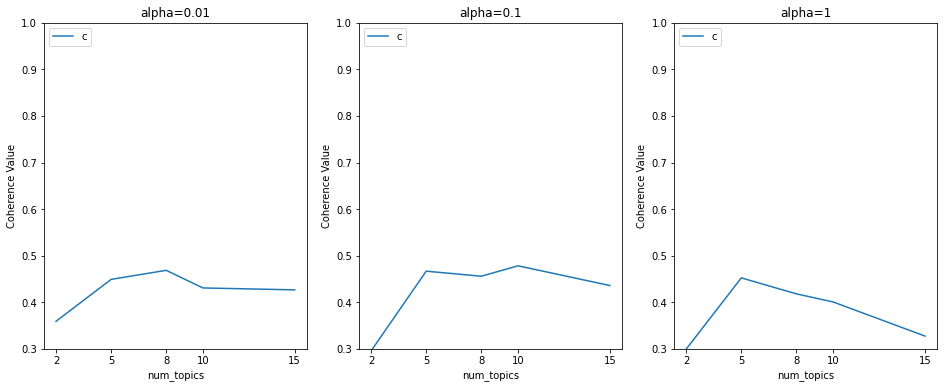

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [16]:
def plot_coherence(coherence_df,alpha_range,num_topics_range):
    plt.figure(figsize=(16,6))
    
    for i,val in enumerate(alpha_range):
        #subolot 1/3/i
        plt.subplot(1,3,i+1)
        alpha_subset=coherence_df[coherence_df['alpha']==val]
        plt.plot(alpha_subset['num_topics'],alpha_subset['coherence_value'])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title('alpha={0}'.format(val))
        plt.ylim([0.30,1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)
plot_coherence(coherence_df,alpha_range,num_topics_range)
plt.savefig('./xiaoguo.jpg',dpi=800,bbox_inches='tight')